<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [7]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y
!pip install pandas
# !pip install requests==2.26.0

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache
DEPRECATION: --no-python-version-warning is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to remove the flag as it's a no-op. Discussion can be found at https://github.com/pypa/pip/issues/13154

Pinned packages:

  - python=3.12

Pinned packages:

  - python=3.12


Transaction

  Prefix: /opt/conda

  All requested packages already installed


Transaction starting

Transaction finished

  Using cached lxml-4.6.4.tar.gz (3.2 MB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      /tmp/pip-inst

In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [11]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [12]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [13]:
tesla_data = tesla.history(period="max")



**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [14]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [16]:
import requests
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
print(html_data[:100])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [17]:
soup_html_parser = BeautifulSoup(html_data,'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Get the webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Create BeautifulSoup object
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table (first table in this case)
table = soup.find('table')

# Extract headers
headers = [th.text.strip() for th in table.find_all('th')]
headers = ['Date', 'Revenue']  # Force specific column names

# Extract rows
rows = []
for tr in table.find_all('tr')[1:]:  # Skip header row
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:  # Only add non-empty rows
        rows.append(cells)

# Create dataframe
tesla_revenue = pd.DataFrame(rows, columns=headers)

# Optional: Display the first few rows
print(tesla_revenue.head())



   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [20]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [41]:
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [42]:
gme_data = gme_ticker.history(period="max")


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [24]:
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [43]:
response = requests.get(url)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = response.text
print(html_data_2[:100])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [44]:
soup = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [27]:
!pip install lxml


table = soup.find('table')

tables = pd.read_html(html_data_2)

# Check how many tables are found
print(f"Number of tables found: {len(tables)}")

# Use the first table (assuming it's the revenue table)
gme_revenue = tables[0]

# Rename columns explicitly
gme_revenue.columns = ['Date', 'Revenue']

# Clean the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Display the full dataframe to verify
print(gme_revenue)




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 104.7 MB/s eta 0:00:00
Number of tables found: 6
    Date  Revenue
0   2021    53823
1   2020    31536
2   2019    24578
3   2018    21461
4   2017    11759
5   2016     7000
6   2015     4046
7   2014     3198
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


/tmp/ipykernel_305/4033060681.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data_2)


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [28]:
print(gme_revenue.tail())

    Date  Revenue
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


/tmp/ipykernel_305/2204424362.py:11: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_305/2204424362.py:34: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_305/2204424362.py:39: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



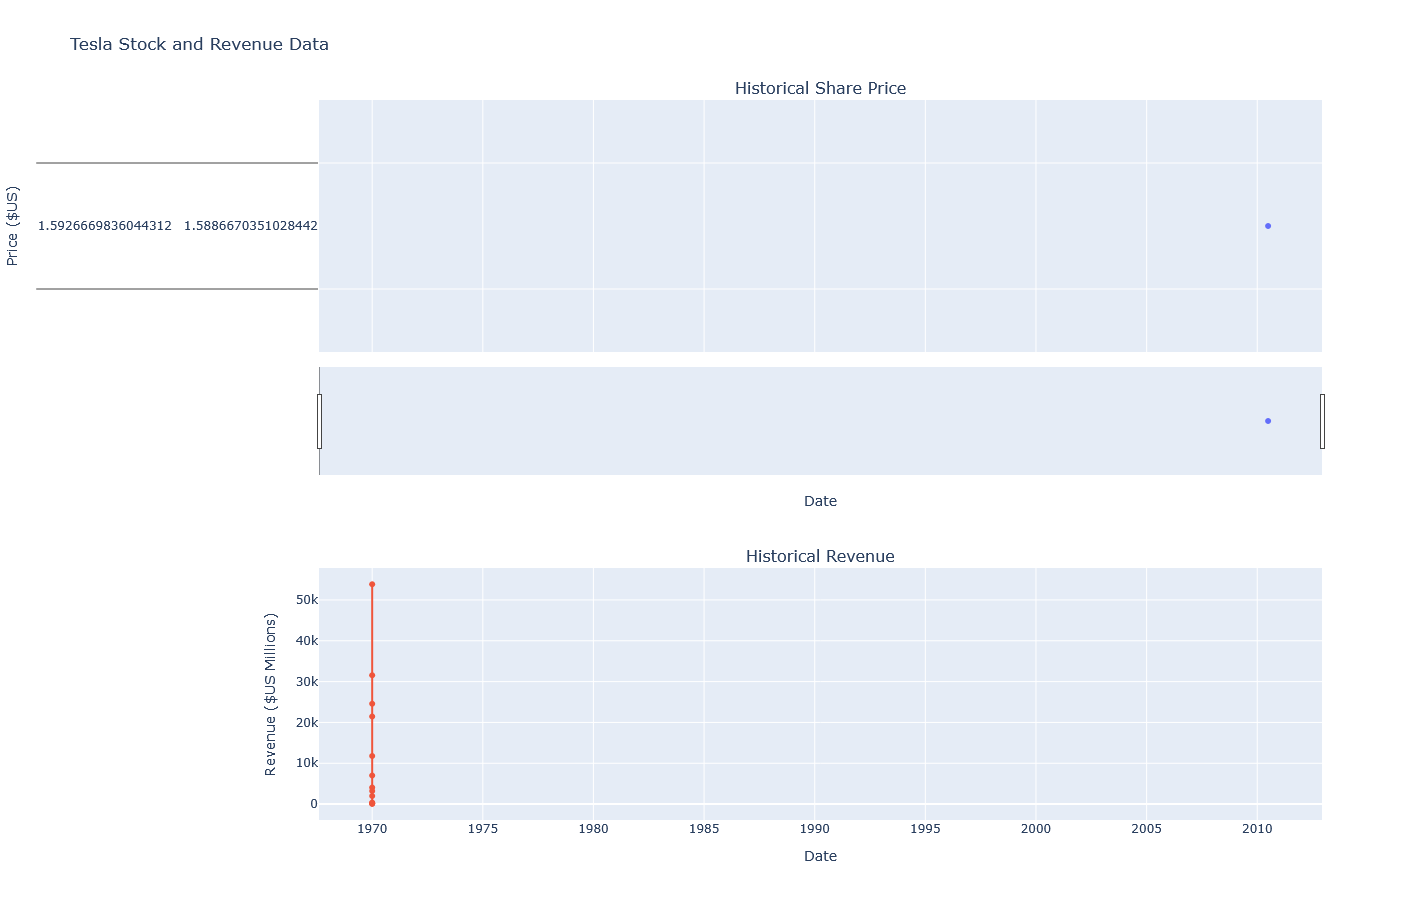

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import requests
import yfinance as yf

# Get Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
tesla_revenue = pd.read_html(html_data)[0]
tesla_revenue.columns = ['Date', 'Revenue']

# Improved cleaning of Revenue column
# Remove dollar signs, commas, and any other non-numeric characters except decimal
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True)
# Convert to float, handling any remaining issues with coercion
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Get Tesla stock data
tesla_stock_data = yf.download('TSLA', start='2010-01-01', end='2021-06-14')
tesla_stock_data = tesla_stock_data.reset_index()

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                       subplot_titles=("Historical Share Price", "Historical Revenue"), 
                       vertical_spacing = .3)
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), 
                            y=stock_data_specific.Close.astype("float"), 
                            name="Share Price"), 
                 row=1, col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
                            y=revenue_data_specific.Revenue.astype("float"), 
                            name="Revenue"), 
                 row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False,
                     height=900,
                     title=stock,
                     xaxis_rangeslider_visible=True)
    fig.show()

# Call the function
make_graph(tesla_stock_data, tesla_revenue, "Tesla Stock and Revenue Data")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


[*********************100%***********************]  1 of 1 completed

GME Data:
Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863060  3.703151  3.714934   26702800
1      2010-01-05  3.959004  3.996036  3.854643  3.856326   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415316  3.573541  3.405216  3.474229   47872400
Price        Date      Close       High        Low       Open    Volume
Ticker                   GME        GME        GME        GME       GME
2875   2021-06-07  70.002502  70.500000  63.799999  64.500000  24206000
2876   2021-06-08  75.000000  86.165001  70.250000  73.000000  69756400
2877   2021-06-09  75.639999  82.000000  72.877502  75.779999  53717200
2878   2021-06-10  55.097500  72.000000  52.750000  70.500000  91920800
2879   2021-06-11  58.334999  60.282501  51.532501  55.587502  62323200
Pri

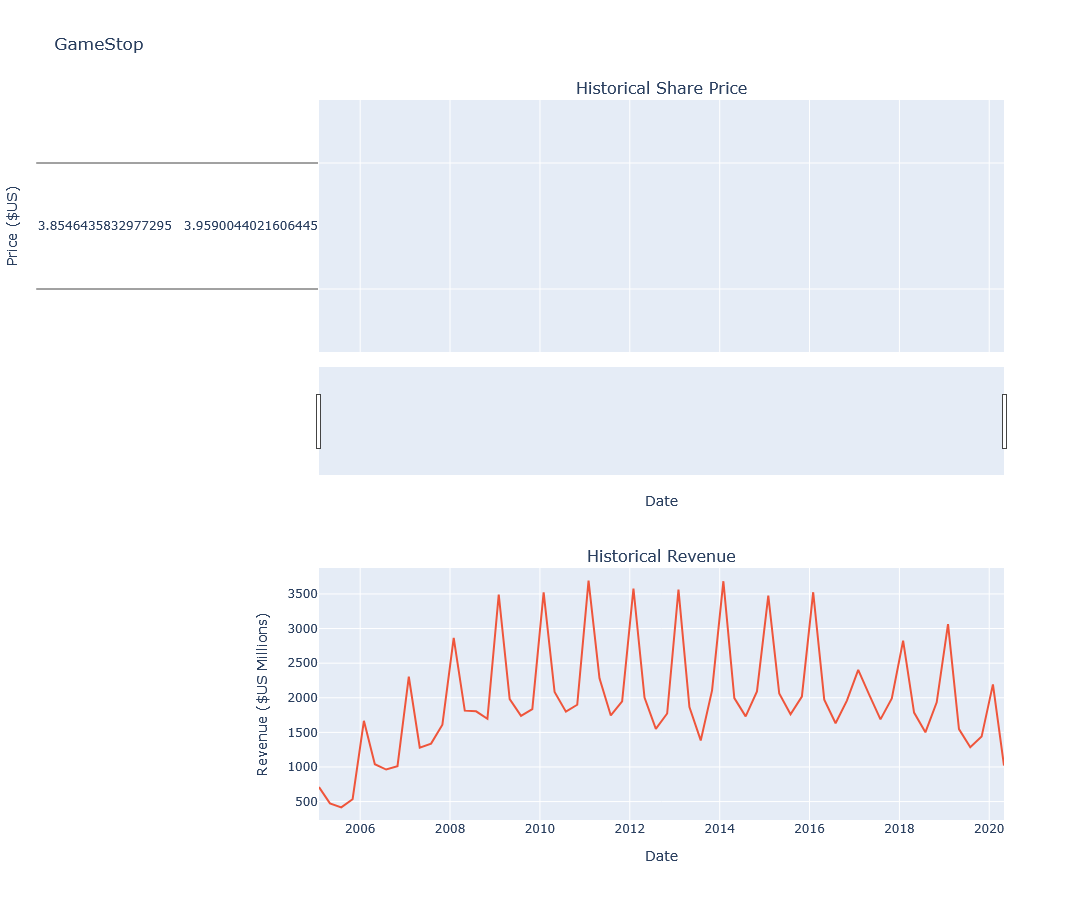

In [64]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import requests
import yfinance as yf
from io import StringIO  # To handle the FutureWarning

# Get GameStop stock data
gme_data = yf.download('GME', start='2010-01-01', end='2021-06-14')
gme_data = gme_data.reset_index()  # Make 'Date' a column

# Debug stock data
print("GME Data:")
print(gme_data.head())
print(gme_data.tail())
print(gme_data.dtypes)
print(len(gme_data))

# Ensure Date is in datetime format
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Get GameStop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text

# Wrap html_data in StringIO to avoid FutureWarning
gme_revenue = pd.read_html(StringIO(html_data))[1]  # Index 1 for GameStop Quarterly Revenue table
gme_revenue.columns = ['Date', 'Revenue']  # Rename columns

# Clean the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Define the make_graph function with debugging and fixes
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                       subplot_titles=("Historical Share Price", "Historical Revenue"), 
                       vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    print("Stock Data Specific:")
    print(stock_data_specific.head())
    print(stock_data_specific.dtypes)
    print(len(stock_data_specific))

    # Ensure dates and prices are properly formatted
    fig.add_trace(go.Scatter(x=stock_data_specific['Date'],  # Use the column directly
                            y=stock_data_specific['Close'].astype("float"),  # Use column directly
                            name="Share Price", 
                            mode='lines'),  # Explicitly set mode to 'lines' for a line plot
                 row=1, col=1)
    
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'],  # Use the column directly
                            y=revenue_data_specific['Revenue'].astype("float"),
                            name="Revenue", 
                            mode='lines'),  # Explicitly set mode to 'lines' for a line plot
                 row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
                     height=900,
                     title=stock,
                     xaxis_rangeslider_visible=True)
    fig.show()

# Call the function as specified
make_graph(gme_data, gme_revenue, 'GameStop')




<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
